In [3]:
import pandas as pd 
import os, sys, sqlite3
import os.path as osp   
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../scripts")
from test_script import azi_zen_from_units

test_folder = osp.join("..", "test_folder")


# dict_2d = pd.read_pickle(osp.join(test_folder, "MuonGun_VonMises2D.dat"))
# dict_2d_clean = pd.read_pickle(osp.join(test_folder, "MuonGun_VonMises2D_cleaned.dat"))
# dict_3d = pd.read_pickle(osp.join(test_folder, "MuonGun_VonMises3D.dat"))
# dict_3d_clean = pd.read_pickle(osp.join(test_folder, "MuonGun_VonMises3D_cleaned.dat"))



In [6]:
set_path =  "/groups/hep/johannbs/data/rasmus_classification_muon_1500k_sets.pkl"
test_ids = pd.read_pickle(set_path)['test']
db_path  = "/groups/hep/johannbs/data/rasmus_classification_muon_3neutrino_3mio.db"
with sqlite3.connect(db_path) as conn:
    df = pd.read_sql(f"select * from truth where event_no in {tuple(test_ids)}", conn)
transforms = pd.read_pickle("/groups/hep/johannbs/data/transformers2.pkl")
for col in df.columns:
    if col in list(transforms['truth'].keys()):
        df[col]     = transforms["truth"][col].inverse_transform(np.array(df[col]).reshape(-1, 1)).flatten()
df = df.sort_values("event_no").set_index("event_no")

array([[<AxesSubplot:title={'center':'energy_log10'}>]], dtype=object)

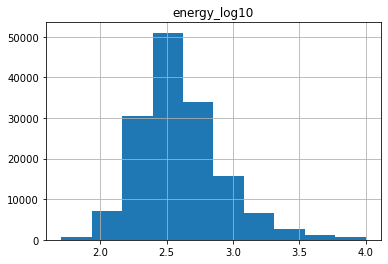

In [9]:
df.hist("energy_log10")

In [12]:
test_folder = osp.join("..", "test_folder")
files       = ["VonMises2D","VonMises3D", "VonMises2D_cleaned", "VonMises3D_cleaned"]
colors      = ["#7595F0", "#CB1ECF", "#9D51E6", "#870C97"]
dfs         = {}

for f in files:
    dict        = pd.read_pickle(osp.join(test_folder, "MuonGun_" + f + ".dat"))
    azi, zen    = azi_zen_from_units(dict["reco"][:, :3])
    azi[azi < 0 ] = azi[azi < 0] + 2 * np.pi
    solid_angle = np.arccos((dict["reco"][:, :3] * dict['targets'][:, :3]).sum(axis = 1)) * 180 / np.pi 
    df_dict     = {"event_no": dict['id'],
                   "azimuth":  azi,
                   "zenith":   zen,
                   "solid":    solid_angle,
                   "ns":       dict['Ns']}
    df_dict = pd.DataFrame(df_dict).sort_values("event_no")
    # df_dict["azimuth"][df_dict["azimuth"] < 0] = df_dict["azimuth"][df_dict["azimuth"] < 0] + 2 * np.pi 
    dfs[f]  = df_dict.set_index("event_no")

In [15]:
azi_tr, zen_tr = azi_zen_from_units(dict["targets"][:, :3])

(array([6.80000e+01, 4.20000e+02, 1.80800e+03, 6.91500e+03, 2.09500e+04,
        1.03809e+05, 1.49360e+04, 9.46000e+02, 1.36000e+02, 1.20000e+01]),
 array([-1.2954441 , -1.0708611 , -0.8462782 , -0.6216952 , -0.39711222,
        -0.17252925,  0.05205373,  0.2766367 ,  0.5012197 ,  0.72580266,
         0.95038563], dtype=float32),
 [<matplotlib.patches.Polygon at 0x7f61872b6f10>])

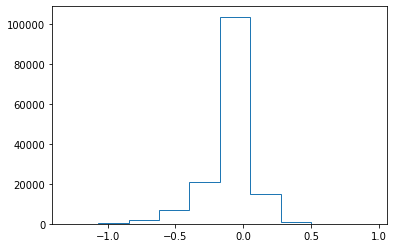

In [18]:
plt.hist(zen - zen_tr, histtype = "step") 
# plt.hist(df.zenith, histtype="step")

In [21]:
dfs["VonMises2D"].azimuth

event_no
138674340.0    1.063859
138674343.0    4.951030
138674348.0    4.506271
138674395.0    1.779154
138674404.0    2.545342
                 ...   
140547587.0    3.381441
140547589.0    2.792386
140547591.0    3.408351
140547610.0    5.340899
140547611.0    2.283916
Name: azimuth, Length: 150000, dtype: float32

In [24]:
df

,energy_log10,time,position_x,position_y,position_z,direction_x,direction_y,direction_z,azimuth,zenith,pid,interaction_type,muon_track_length,stopped_muon
event_no,,,,,,,,,,,,,,
138674340,2.422178,8127.648855,17.395869,799.810842,-190.892722,-0.449283,-0.652320,-0.610429,0.967663,0.914194,13,None,890.061457,1
138674343,2.582473,7874.277010,174.832033,-92.164410,800.000000,-0.100173,0.485243,-0.868622,4.915968,0.518382,13,None,1288.928741,1
138674348,2.741827,7622.870128,233.103963,-476.705131,800.000000,0.105480,0.490114,-0.865253,4.500407,0.525142,13,None,1858.290805,0
138674395,2.892850,7262.055250,-569.717509,561.624394,-17.939351,-0.016162,-0.809587,-0.586777,1.550835,0.943723,13,None,1484.012802,0
138674404,3.030481,7787.132706,-439.854145,553.403844,800.000000,0.468519,-0.310395,-0.827131,2.556479,0.596813,13,None,2465.041613,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140547587,2.673393,7125.746989,152.850271,-156.670141,800.000000,0.417584,0.528482,-0.739142,4.043678,0.739001,13,None,1399.322120,0
140547589,2.840810,6575.203402,-581.467622,549.450093,482.211429,0.478954,-0.047594,-0.876549,3.042548,0.502151,13,None,1467.817377,1
140547591,2.359066,7290.418728,-223.904741,-281.907914,800.000000,0.440482,0.216317,-0.871311,3.598089,0.512929,13,None,819.887470,1


In [39]:
def chosen_percentiles(diffs):
    diffs = diffs[~np.isnan(diffs)]
    u, median, low_one_sig = np.percentile(diffs, [16, 50, 68])
    return u, median, low_one_sig 

def performance(diffs, Ns):
    cuts = np.linspace(2, 4, 9)
    mask = np.searchsorted(cuts, Ns)

    us, meds, lows, ns = [], [], [], []

    u, m, l = chosen_percentiles(diffs)
    print(f"Measured to {l:.2f}, {m:.2f}, {u:.3f}")

    for i in np.unique(mask):
        u, median, low = chosen_percentiles(diffs[mask == i])

        us.append(u)
        meds.append(median)
        lows.append(low)
        ns.append(np.mean(Ns[mask == i]))
    
    return_dict = {
        "us": np.array(us),
        "meds": np.array(meds),
        "lows": np.array(lows),
        "ns":  np.array(ns)
    }
    return return_dict
    




In [40]:
from matplotlib.gridspec import GridSpec

In [41]:
df['energy_log10'].describe()

count    150000.000000
mean          2.599023
std           0.313405
min           1.705066
25%           2.390335
50%           2.557919
75%           2.762837
max           3.999484
Name: energy_log10, dtype: float64

In [42]:
cuts = np.linspace(1.5, 4, 11)
cuts

array([1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  ])

solid
VonMises2D
Measured to 7.10, 4.19, 1.624
VonMises3D
Measured to 7.00, 4.14, 1.615
VonMises2D_cleaned
Measured to 11.99, 6.52, 2.236
VonMises3D_cleaned
Measured to 12.00, 6.42, 2.027
azi
VonMises2D
/groups/hep/johannbs/anaconda3/envs/tf/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
Measured to 10.63, 5.57, 1.342
VonMises3D
Measured to 10.27, 5.38, 1.299
VonMises2D_cleaned
Measured to 18.75, 8.89, 1.821
VonMises3D_cleaned
Measured to 17.57, 8.37, 1.715
zenith
VonMises2D
Measured to 3.17, 1.88, 0.515
VonMises3D
Measured to 3.50, 2.02, 0.542
VonMises2D_cleaned
Measured to 4.40, 2.60, 0.725
VonMises3D_cleaned
Measured to 6.22, 2.96, 0.705
<ipython-input-47-cfdd818528b8>:127: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout()


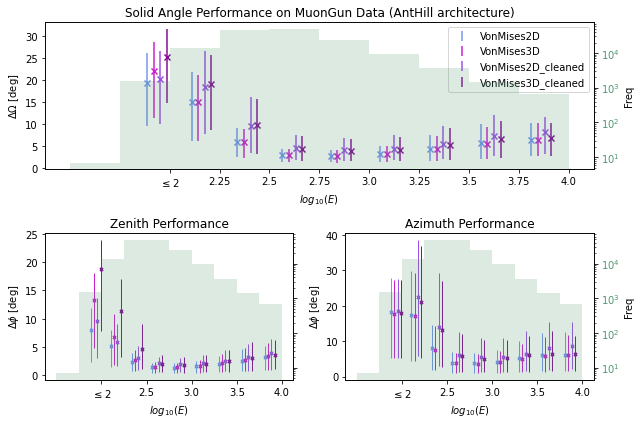

In [47]:
fig     = plt.figure(figsize = (9, 6), constrained_layout = True)
gs      = GridSpec(2, 2, figure = fig)

cuts = np.linspace(1.5, 4, 11)
ticks = np.linspace(2, 4, 9)
tick_labels = ["$\leq 2$"] + [str(t) for t in ticks[1:]]

bkg_color = "#519872"


ax_sol  = fig.add_subplot(gs[0, :])
ax_zen  = fig.add_subplot(gs[1, 0])
ax_azi  = fig.add_subplot(gs[1, 1])


#### SOLID #### 
# 3D 
ax = ax_sol
ax2 = ax.twinx()
# ax_sol.set_zorder(ax2.get_zorder() + 1)

ax2.hist(df['energy_log10'], bins = cuts, zorder = 5, alpha = 0.2, color = bkg_color, range = (1, 4.5));
ax2.set_ylabel("Freq")
ax2.tick_params(axis = "y", labelcolor = bkg_color)
ax2.set_yscale("log")


offset = np.linspace(-0.05, 0.05, len(files))
print("solid")
for f, c, off in zip(files, colors, offset): 
    print(f)
    dict = performance(dfs[f]["solid"], df["energy_log10"])
    x, y = dict["ns"], dict["meds"]
    h, l = dict["us"], dict["lows"]
    ax.scatter(x + off, y, color = c, marker = "x", ls = "None")
    ax.errorbar(x + off, y, yerr = np.vstack([y - l, h - y]), color = c, marker = None, s = None, label = f, ls = "None")


ax.set_ylabel("$\Delta \Omega$ [deg]")
ax.set_xlabel("$log_{10}(E)$")

ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)

# tick_labels = ax.get_xticklabels()
# tick_labels[0], tick_labels[1] = " ", "$\leq2$"
# ax.set_xticklabels([str(t) for t in tick_labels])

ax.set_title("Solid Angle Performance on MuonGun Data (AntHill architecture)")
ax.legend(loc = "upper right")



ticks = np.linspace(2, 4, 5)
tick_labels = ["$\leq 2$"] + [str(t) for t in ticks[1:]]


#### AZI #### 
ax = ax_azi
def angle_diffs(A, B):
    return np.arccos(np.cos(A) * np.cos(B) + np.sin(A) * np.sin(B)) * 180 / np.pi

offset *= 1.1
print("azi")

for f, c, off in zip(files, colors, offset): 
    print(f)
    azi_diff = angle_diffs(dfs[f]["azimuth"], df["azimuth"])
    dict = performance(azi_diff, df["energy_log10"])
    x, y = dict["ns"], dict["meds"]
    h, l = dict["us"], dict["lows"]
    ax.scatter(x + off, y, color = c, marker = "x", ls = "None", zorder = 1, s = 10)
    ax.errorbar(x + off, y, yerr = np.vstack([y - l, h - y]), color = c, marker = None, elinewidth = 1, label = f, ls = "None", zorder = 1)

ax.set_ylabel(r"$\Delta \phi$ [deg]")
ax.set_xlabel(r"$log_{10}(E)$")

ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)

ax.set_title("Azimuth Performance")

ax2_azi = ax.twinx()

ax2_azi.hist(df.energy_log10, bins = cuts, zorder = -1, alpha = 0.2, color = bkg_color, range = (1.5, 4.5));
ax2_azi.tick_params(axis = "y", labelcolor = bkg_color)

ax2_azi.set_ylabel("Freq")
ax2_azi.set_yscale("log")





# ##### Zenith ##### 
ax = ax_zen

print("zenith")
for f, c, off in zip(files, colors, offset): 
    print(f)
    azi_diff = angle_diffs(dfs[f]["zenith"], df["zenith"])
    dict = performance(azi_diff, df["energy_log10"])
    x, y = dict["ns"], dict["meds"]
    h, l = dict["us"], dict["lows"]
    ax.scatter(x + off, y, color = c, marker = "x", ls = "None", s = 10)
    ax.errorbar(x + off, y, yerr = np.vstack([y - l, h - y]), color = c, marker = None, s = None, label = f, ls = "None", elinewidth = 1)

ax.set_ylabel(r"$\Delta \phi$ [deg]")
ax.set_xlabel(r"$log_{10}(E)$")

ax.set_title("Zenith Performance")

ax2_zen = ax.twinx()
ax2_zen.tick_params(axis = "y", labelcolor = bkg_color)
ax2_zen.set_yscale("log")
# ax2_zen.get_shared_y_axes().join(ax2_zen, ax2_azi)

ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)


ax2_zen.hist(df.energy_log10, bins = cuts, zorder = 5, alpha = 0.2, color = bkg_color, range = (1.5, 4.5));
# ax2_zen.set_ylabel("Freq")

ax2_zen.set_yticklabels([])

fig.tight_layout()

In [44]:
fig.savefig("../figures/MuonGunAngles.pdf")

In [45]:
dict

{'us': array([7.91049472, 3.15925915, 1.06129434, 0.54188577, 0.48875757,
        0.53165009, 0.62840605, 0.8444269 , 1.06371056]),
 'meds': array([18.71826195, 11.42823877,  4.63264255,  2.02813078,  1.80762531,
         2.02395114,  2.44613043,  3.13297973,  3.50462016]),
 'lows': array([23.97439152, 17.0302943 ,  9.0532776 ,  3.63808399,  3.19513061,
         3.57523184,  4.48030026,  5.88736415,  6.1884468 ]),
 'ns': array([1.93655981, 2.15935596, 2.38913622, 2.61422856, 2.8570256 ,
        3.10520237, 3.35421752, 3.60804084, 3.86175503])}